In [1]:
import re
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk

from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/m.baushenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Data

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()


(5495, 4)


,id,movie_name,movie_description,target
0,3525e31d,Hellraiser,A new take on Clive Barker's 1987 horror class...,Horror
1,051f6309,Hocus Pocus 2,It's been 29 years since someone lit the Black...,Kids
2,12a9bfcf,X,"In 1979, a group of young filmmakers set out t...",Horror
3,e5373c77,Piggy,With the summer sun beating down on her rural ...,Horror
4,473cdb82,Deadstream,After a public controversy left him disgraced ...,Horror


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()


(788, 3)


,id,movie_name,movie_description
0,d996f823,Mr. Harrigan's Phone,"When Craig, a young boy living in a small town..."
1,1cf01f9c,To Leslie,Leslie (Andrea Riseborough) is a West Texas si...
2,856ea05c,Hellraiser,Sexual deviant Frank (Sean Chapman) inadverten...
3,c97899ee,You Won't Be Alone,Set in an isolated mountain village in 19th ce...
4,73f0740f,"Confess, Fletch","In this delightful comedy romp, Jon Hamm stars..."


## Target Distributions

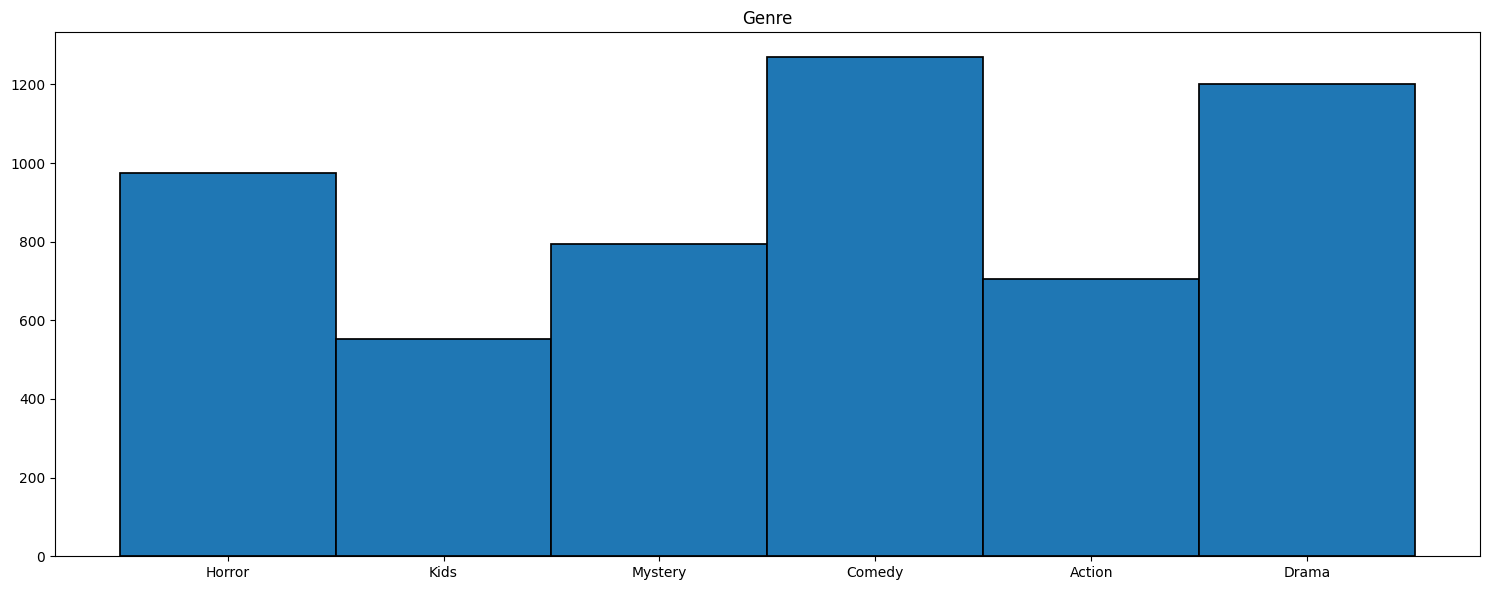

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))

sns.histplot(x="target", data=train, linewidth=1.25,
             alpha=1, ax=axes, zorder=2)
axes.set_title("Genre")
axes.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()


### (As a percentage)

In [5]:
print(train.target.value_counts(normalize=True))


Comedy     0.230937
Drama      0.218744
Horror     0.177252
Mystery    0.144495
Action     0.128116
Kids       0.100455
Name: target, dtype: float64


## Number words

In [6]:
print("Number words in train dataset: ", len(
    " ".join(train.movie_description.tolist()).split()))
print("Number words in test dataset: ", len(
    " ".join(test.movie_description.tolist()).split()))


Number words in train dataset:  327357
Number words in test dataset:  47711


## Vocabulary size

In [7]:
vocab_size = len(set(" ".join(train.movie_description.tolist()).split(
) + " ".join(test.movie_description.tolist()).split()))
print("Vocabulary size: ", vocab_size)


Vocabulary size:  48721


## Movie Description Example

In [8]:
def print_texts(df):
    inner_html = ""
    for idx, row in df.iterrows():
        inner_html += f"""
        <td style="vertical-align:top; border-right: 1px solid #7accd8">
        <h3 style="text-align:left">{row.movie_name}</h3>
        <hr>
            <dl>
                <dt> Genre </dt>
                <dd>{row.target}</dd>
            </dl>
            
            <hr>
            <p>
            {row.movie_description}
            </p>
        </td>
        """
    display(HTML(f"""
    <table style="font-family: monospace;">
        <tr>
             {inner_html}
        </tr>
    </table>
    """))


In [9]:
horror_genre = train[train.target == "Horror"].head(2)
print_texts(horror_genre)


"Hellraiser Genre Horror A new take on Clive Barker's 1987 horror classic in which a young woman struggling with addiction comes into possession of an ancient puzzle box, unaware that its purpose is to summon the Cenobites, a group of sadistic supernatural beings from another dimension.","X Genre Horror In 1979, a group of young filmmakers set out to make an adult film in rural Texas, but when their reclusive, elderly hosts catch them in the act, the cast find themselves fighting for their lives."


In [10]:
comedy_genre = train[train.target == "Comedy"].head(2)
print_texts(comedy_genre)


"The Greatest Beer Run Ever Genre Comedy To show support for his neighborhood friends serving in Vietnam, Chickie Donohue (Zac Efron) decides to do something totally outrageous: travel to the frontline by himself to bring the soldiers a little piece of home -- their favorite can of American beer. However, what started as a well-meaning journey quickly turns into the adventure of a lifetime as Chickie confronts the reality of this controversial war and his reunions with his childhood buddies thrust him into the complexities and responsibilities of adulthood. Based on an incredible true story, ""The Greatest Beer Run Ever"" is a heartfelt coming-of-age tale about friendship, loyalty and sacrifice.","Everything Everywhere All at Once Genre Comedy Directed by Daniel Kwan and Daniel Scheinert, collectively known as Daniels, the film is a hilarious and big-hearted sci-fi action adventure about an exhausted Chinese American woman (Michelle Yeoh) who can't seem to finish her taxes."


## Text Analysis

### Number of Characters

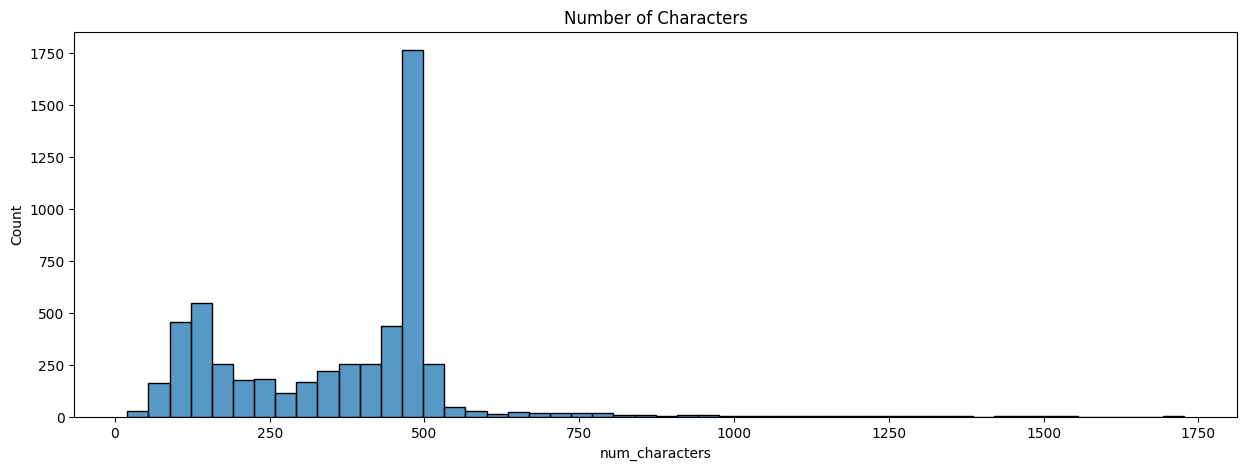

In [11]:
fig = plt.figure(figsize=(15, 5))
train["num_characters"] = train["movie_description"].str.len()

sns.histplot(data=train, x="num_characters")
plt.title("Number of Characters")
plt.show()


In [12]:
fig = px.histogram(
    train,
    x=train["movie_description"].str.len(),
    marginal="box",
    title="Number of Characters",
    color_discrete_sequence=["#FFA200"]
)
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(
    family="PT Sans", size=18, color="#C4FEFF"))
fig.show()


### Number of Words

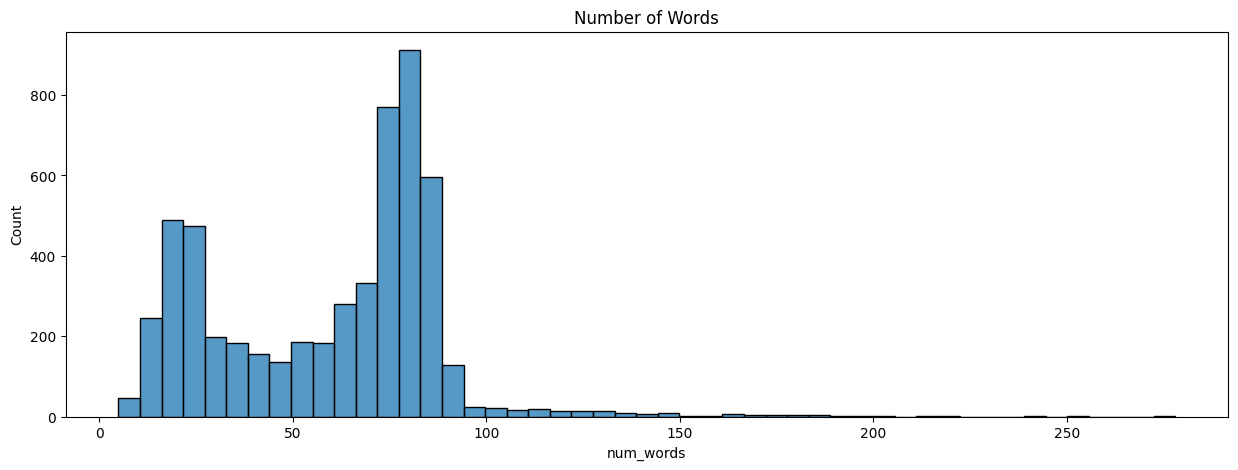

In [13]:
fig = plt.figure(figsize=(15, 5))
train["num_words"] = train["movie_description"].apply(
    lambda x: len(str(x).split()))
sns.histplot(data=train, x="num_words")
plt.title("Number of Words")
plt.show()


In [14]:
fig = px.histogram(
    train,
    x=train["num_words"],
    marginal="box",
    title="Number of Words",
    color_discrete_sequence=["#FFA200"]
)
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(
    family="PT Sans", size=18, color="#C4FEFF"))
fig.show()


In [15]:
train["num_words"].describe()


count    5495.000000
mean       59.573612
std        29.041884
min         5.000000
25%        30.000000
50%        69.000000
75%        80.000000
max       278.000000
Name: num_words, dtype: float64

### Common Stopwords

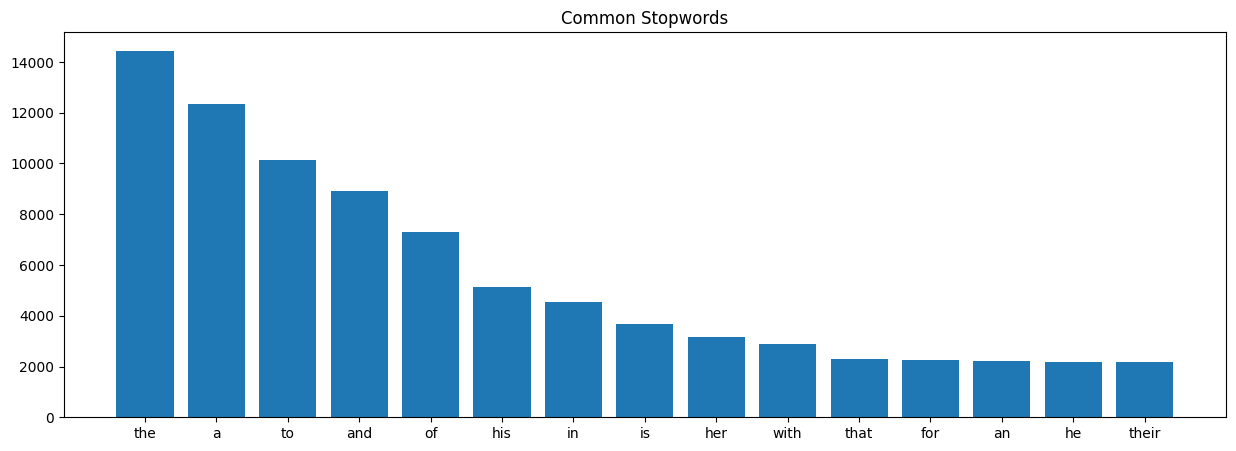

In [16]:
fig = plt.figure(figsize=(15, 5))

stop_words = set(stopwords.words("english"))
corpus = "".join(map(str, train.movie_description)).split()

dic = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word] += 1
top_words = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
x, y = zip(*top_words)
plt.bar(x, y)
plt.title("Common Stopwords")
plt.show()


### Word Cloud

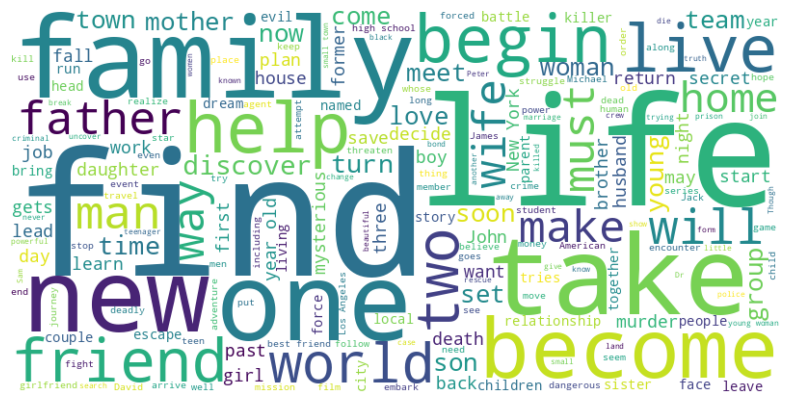

In [17]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, train.movie_description)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
